In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

from pathlib import Path

In [18]:
entries_df = pd.read_csv(Path("../data/entries2.csv"))
entries_df["date"] = pd.to_datetime(entries_df["date"])
entries_df.loc[(entries_df['date'] > '2014-07-31') & (entries_df['date'] < '2017-06-01'), "city_name"] = "Champaign"
entries_df.loc[(entries_df['date'] < '2014-08-01'), "city_name"] = "Chicago"
entries_df.loc[(entries_df['date'] >= '2017-06-01') & (entries_df['date'] < '2020-01-01') & entries_df['city_name'].isna(), "city_name"] = "San Francisco"

weather_df = pd.read_csv(Path("../data/weather.csv"))
weather_df["date"] = pd.to_datetime(weather_df["date"])

In [19]:
entries_df.head()

,id,_hash,uuid,date,emotion,context,sentiment,sentiment_score,city_name
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04 05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,0.949958,Chicago
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05 03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,0.933307,Chicago
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05 18:00:10,joy,angry|disgusted,POSITIVE,0.969270,Chicago
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10 18:00:01,neutral,angry|devastated,POSITIVE,0.973275,Chicago
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12 21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,0.983425,Chicago


In [20]:
weather_df.head()

,Unnamed: 0,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date
0,0,1293840000,2011-01-01 00:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,13.07,10000.0,11.97,...,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n,2011-01-01 00:00:00
1,1,1293843600,2011-01-01 01:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,9.54,10000.0,8.47,...,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n,2011-01-01 01:00:00
2,2,1293847200,2011-01-01 02:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,9.50,10000.0,8.43,...,0.20,NaN,NaN,NaN,90,500,Rain,light rain,10n,2011-01-01 02:00:00
3,3,1293850800,2011-01-01 03:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,8.80,10000.0,7.09,...,0.12,NaN,NaN,NaN,90,500,Rain,light rain,10n,2011-01-01 03:00:00
4,4,1293854400,2011-01-01 04:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,8.94,10000.0,6.73,...,NaN,NaN,NaN,NaN,90,500,Rain,light rain,10n,2011-01-01 04:00:00


In [22]:
def find_weather(date, city_name, key):
    return weather_df.loc[(weather_df["date"] >= date) & (weather_df["date"] < date + pd.DateOffset(hours=1)) & (weather_df["city_name"] == city_name), key][:1]


def get_weather(date, city_name, key):
    result = find_weather(date, city_name, key)
    if result.empty:
        return
    return result.iloc[0]

In [23]:
entries_df["clouds_all"] = entries_df.apply(lambda e: get_weather(e.date, e.city_name, "clouds_all"), axis=1)
entries_df.head()

,id,_hash,uuid,date,emotion,context,sentiment,sentiment_score,city_name,clouds_all
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04 05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,0.949958,Chicago,1.0
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05 03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,0.933307,Chicago,40.0
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05 18:00:10,joy,angry|disgusted,POSITIVE,0.969270,Chicago,40.0
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10 18:00:01,neutral,angry|devastated,POSITIVE,0.973275,Chicago,75.0
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12 21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,0.983425,Chicago,75.0


In [24]:
entries_df["weather_main"] = entries_df.apply(lambda e: get_weather(e.date, e.city_name, "weather_main"), axis=1)

In [38]:
entries_df["temp"] = entries_df.apply(lambda e: get_weather(e.date, e.city_name, "temp"), axis=1)

In [39]:
entries_df["weather_description"] = entries_df.apply(lambda e: get_weather(e.date, e.city_name, "weather_description"), axis=1)

In [40]:
entries_df.head()

,id,_hash,uuid,date,emotion,context,sentiment,sentiment_score,city_name,clouds_all,weather_main,temp,weather_description
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04 05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,0.949958,Chicago,1.0,Clear,26.78,sky is clear
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05 03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,0.933307,Chicago,40.0,Clouds,22.97,scattered clouds
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05 18:00:10,joy,angry|disgusted,POSITIVE,0.969270,Chicago,40.0,Clouds,27.94,scattered clouds
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10 18:00:01,neutral,angry|devastated,POSITIVE,0.973275,Chicago,75.0,Clouds,22.04,broken clouds
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12 21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,0.983425,Chicago,75.0,Clouds,24.65,broken clouds


In [41]:
entries_df.loc[entries_df["city_name"] == "San Francisco"]

,id,_hash,uuid,date,emotion,context,sentiment,sentiment_score,city_name,clouds_all,weather_main,temp,weather_description
189,20180625053428,3880c117a74dbb50b502d031a421edf8,7AECFE5C41DE471CBF6F1C9717B4120B,2018-06-25 05:34:28,neutral,proud,POSITIVE,0.996326,San Francisco,91.0,Clouds,14.47,overcast clouds
190,20180625053533,b50c251df9b7c0a275c2b4a1f30ac397,AE8DC51CB1A6402CB9E774E9D66FD2F2,2018-06-25 05:35:33,disgust,anxious|sentimental|joyful|terrified|hopeful,NEGATIVE,0.978027,San Francisco,91.0,Clouds,14.47,overcast clouds
191,20180626200649,e703c75fd71064a5c2b5526440792125,169B379A850F416FA6ABBD6EE9B4F8A7,2018-06-26 20:06:49,neutral,guilty,NEGATIVE,0.999589,San Francisco,2.0,Clear,16.48,sky is clear
192,20180629153609,664301a2b98f90df3c6854cbc2060e61,E4B6F3BE590F4DCDB0618F845CBEDCDC,2018-06-29 15:36:09,surprise,trusting,POSITIVE,0.992618,San Francisco,5.0,Clear,15.13,sky is clear
193,20180630074210,a6f1c9b38d49f04d8af30c658dc84629,4696CD3DF2694313BD10B649013B67A5,2018-06-30 07:42:10,sadness,angry|excited|anxious|trusting,NEGATIVE,0.985234,San Francisco,0.0,Clear,15.81,sky is clear
194,20180709031329,e5cc94ccad206677a8ea4c8093d986e5,8F31CF0AC65B4F619BCCB784A765D5E2,2018-07-09 03:13:29,sadness,angry|disgusted|anxious|trusting,NEGATIVE,0.985182,San Francisco,1.0,Clear,16.02,sky is clear
195,20180710154751,a63d7ee271a70aec9b98a0acc3a8ce05,39D2109F966D458B87D94F2BC850B82D,2018-07-10 15:47:51,neutral,sentimental|joyful|angry|annoyed|excited|trusting,NEGATIVE,0.990710,San Francisco,1.0,Clear,17.04,sky is clear
197,20180726204959,df199a16ecbd08ee7ac266eeb1d93955,2A709313630E4BB8A5FD1ABEFF4E57B1,2018-07-26 20:49:59,neutral,angry|terrified|anticipating,NEGATIVE,0.958168,San Francisco,42.0,Clouds,16.82,scattered clouds
198,20180727003323,635bb2fb06e1384f8277a71181aaaa8b,387B7F2681914745AA59FB0F87D61097,2018-07-27 00:33:23,sadness,anxious|apprehensive|devastated|hopeful|angry|...,NEGATIVE,0.988764,San Francisco,34.0,Clouds,15.64,scattered clouds
199,20180729170630,0f2254cf9ae63edc0f770c0af16671e8,2C1AD2EB90274C82A857F91C93BA4158,2018-07-29 17:06:30,neutral,angry|content|terrified|trusting|disgusted,NEGATIVE,0.986294,San Francisco,68.0,Clouds,13.89,broken clouds


In [42]:
weather_df.to_csv("/home/jovyan/work/research/data/weather.csv")
entries_df.to_csv("/home/jovyan/work/research/data/entries_with_weather.csv")

In [88]:
entries_df["weather_main"].value_counts()

Clouds          139
Clear            53
Rain             24
Mist              9
Snow              7
Haze              2
Thunderstorm      1
Name: weather_main, dtype: int64

In [91]:
entries_df["sentiment"].value_counts()

NEGATIVE    148
POSITIVE     95
Name: sentiment, dtype: int64

In [92]:
entries_df.head()

,id,_hash,uuid,date,emotion,context,sentiment,sentiment_score,city_name,clouds_all,weather_main,temp,weather_description,sent
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04 05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,0.949958,Chicago,1.0,Clear,26.78,sky is clear,0.0
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05 03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,0.933307,Chicago,40.0,Clouds,22.97,scattered clouds,0.0
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05 18:00:10,joy,angry|disgusted,POSITIVE,0.969270,Chicago,40.0,Clouds,27.94,scattered clouds,1.0
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10 18:00:01,neutral,angry|devastated,POSITIVE,0.973275,Chicago,75.0,Clouds,22.04,broken clouds,1.0
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12 21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,0.983425,Chicago,75.0,Clouds,24.65,broken clouds,0.0


In [120]:
table = pd.crosstab(entries_df["weather_main"], entries_df["weather_description"])
table

weather_description,broken clouds,few clouds,haze,heavy intensity rain,light rain,light rain and snow,light snow,mist,moderate rain,overcast clouds,scattered clouds,sky is clear,thunderstorm with light rain
weather_main,,,,,,,,,,,,,
Clear,0,0,0,0,0,0,0,0,0,0,0,53,0
Clouds,27,26,0,0,0,0,0,0,0,44,42,0,0
Haze,0,0,2,0,0,0,0,0,0,0,0,0,0
Mist,0,0,0,0,0,0,0,9,0,0,0,0,0
Rain,0,0,0,1,18,0,0,0,5,0,0,0,0
Snow,0,0,0,0,0,1,6,0,0,0,0,0,0
Thunderstorm,0,0,0,0,0,0,0,0,0,0,0,0,1


In [121]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2


def chisquared_test(table, prob=0.95):
    print(table)
    stat, p, dof, expected = chi2_contingency(table)
    print('dof=%d' % dof)
    print(expected)
    # interpret test-statistic
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

In [122]:
chisquared_test(table)

weather_description  broken clouds  few clouds  haze  heavy intensity rain  \
weather_main                                                                 
Clear                            0           0     0                     0   
Clouds                          27          26     0                     0   
Haze                             0           0     2                     0   
Mist                             0           0     0                     0   
Rain                             0           0     0                     1   
Snow                             0           0     0                     0   
Thunderstorm                     0           0     0                     0   

weather_description  light rain  light rain and snow  light snow  mist  \
weather_main                                                             
Clear                         0                    0           0     0   
Clouds                        0                    0           0     0   
H

In [51]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [52]:
import seaborn as sns
sns.set()

<AxesSubplot:xlabel='sentiment', ylabel='emotion'>

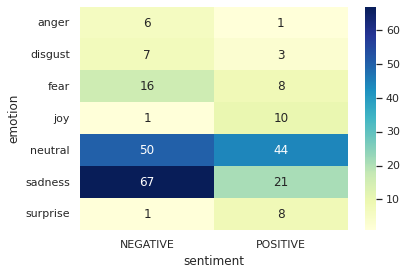

In [53]:
sns.heatmap(table, annot=True, cmap="YlGnBu")

In [55]:
tips = sns.load_dataset("tips")

In [56]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [60]:
entries_df.loc[entries_df["sentiment"] == "POSITIVE", "sent"] = 1

In [61]:
entries_df.loc[entries_df["sentiment"] == "NEGATIVE", "sent"] = 0

<AxesSubplot:xlabel='clouds_all', ylabel='temp'>

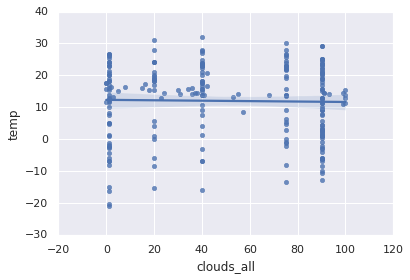

In [68]:
sns.(x="clouds_all", y="temp", data=entries_df)

In [70]:
entries_df

,id,_hash,uuid,date,emotion,context,sentiment,sentiment_score,city_name,clouds_all,weather_main,temp,weather_description,sent
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04 05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,0.949958,Chicago,1.0,Clear,26.78,sky is clear,0.0
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05 03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,0.933307,Chicago,40.0,Clouds,22.97,scattered clouds,0.0
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05 18:00:10,joy,angry|disgusted,POSITIVE,0.969270,Chicago,40.0,Clouds,27.94,scattered clouds,1.0
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10 18:00:01,neutral,angry|devastated,POSITIVE,0.973275,Chicago,75.0,Clouds,22.04,broken clouds,1.0
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12 21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,0.983425,Chicago,75.0,Clouds,24.65,broken clouds,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,20210718062511,ae1f896aa8999d2c5c3b9543c0e4bf4a,413D6185B13C4BDBA3AE9B8C29237944,2021-07-18 06:25:11,neutral,joyful|terrified,NEGATIVE,0.849702,New York,NaN,None,NaN,None,0.0
239,20210807210947,68b329da9893e34099c7d8ad5cb9c940,4FF15B5F612841D4A533ECF014AAB5ED,2021-08-07 21:09:47,neutral,terrified,POSITIVE,0.748121,NaN,NaN,None,NaN,None,1.0
240,20210828053633,85e53e507fc613478699f21e1e6ebc90,473AB1B87CA84079872520C585AE3904,2021-08-28 05:36:33,anger,proud|excited|angry,NEGATIVE,0.996161,Chicago,20.0,Clouds,27.83,few clouds,0.0
241,20220629001153,2e6f10ed44e23ba91c0f9c36b5b83b09,FD44D72956044DA49B208FE1362DC513,2022-06-29 00:11:53,sadness,content|apprehensive,POSITIVE,0.823476,Teaneck,NaN,None,NaN,None,1.0


In [162]:
entry_filepath = Path("/home/jovyan/work/thoughtlog/20140307151903.DCA366A1D928415CA69C8A06FFAD2575.c5a4bd83538afb90ee7615d69bdddcdd.json")

In [163]:
entry_filepath.exists()

True

In [164]:
import json

with open(entry_filepath, "r") as f:
    data = json.load(f)

In [165]:
data

{'_hash': 'c5a4bd83538afb90ee7615d69bdddcdd',
 'date': '2014-03-07T15:19:03',
 'id': 20140307151903,
 'uuid': 'DCA366A1D928415CA69C8A06FFAD2575',
 'metadata': {'tl_source_dir': '/home/jovyan/work/research/data/Journal/2014',
  'tl_source_file': '2014-03-07_151903.txt'},
 'text': "DATE: 2014-03-07 15:19:03\n\nI'm feeling really low right now, as though I'm being pulled into a violent stream of water. \n\nThis week hasn't been easy. I've had to stay late at a school deploying iPads by myself, my only companions the syncing carts and the MacBooks that accompanied them. \n\nI needed to get all the carts in one place, so I headed to the seventh grade wing on the other side of the building to get the 7th grade carts to the 6th grade wing. \n\nIt was closed when I got there and I lost it. I kicked the doors. I muttered angrily to myself. I dropped F bombs in the team chat room. I was furious. \n\nThen I thought about how close it was to getting to three years. Three years since I tried to off

In [166]:
data.keys()

dict_keys(['_hash', 'date', 'id', 'uuid', 'metadata', 'text', 'analysis'])

In [167]:
analysis = data["analysis"]
stats = analysis["stats"]
labels = analysis["labels"]

In [168]:
paragraphs = labels["paragraphs"]

In [169]:
paragraphs

[{'emotion': [{'label': 'neutral', 'score': 0.8522135615348816}],
  'context': [{'label': 'joyful', 'score': 0.045676544308662415},
   {'label': 'faithful', 'score': 0.04079226031899452},
   {'label': 'excited', 'score': 0.03869829699397087}],
  'text': 'DATE: 2014-03-07 15:19:03',
  'sentiment': [{'label': 'POSITIVE', 'score': 0.9402477145195007}]},
 {'emotion': [{'label': 'sadness', 'score': 0.35896438360214233}],
  'context': [{'label': 'confident', 'score': 0.040857233107089996},
   {'label': 'impressed', 'score': 0.04060980677604675},
   {'label': 'caring', 'score': 0.040316078811883926}],
  'text': "I'm feeling really low right now, as though I'm being pulled into a violent stream of water.",
  'sentiment': [{'label': 'NEGATIVE', 'score': 0.9990023970603943}]},
 {'emotion': [{'label': 'sadness', 'score': 0.5996877551078796}],
  'context': [{'label': 'excited', 'score': 0.0560583770275116},
   {'label': 'jealous', 'score': 0.050457101315259933},
   {'label': 'apprehensive', 'score

In [170]:
p = paragraphs[0]

In [171]:
p

{'emotion': [{'label': 'neutral', 'score': 0.8522135615348816}],
 'context': [{'label': 'joyful', 'score': 0.045676544308662415},
  {'label': 'faithful', 'score': 0.04079226031899452},
  {'label': 'excited', 'score': 0.03869829699397087}],
 'text': 'DATE: 2014-03-07 15:19:03',
 'sentiment': [{'label': 'POSITIVE', 'score': 0.9402477145195007}]}

In [172]:
p["emotion"]

[{'label': 'neutral', 'score': 0.8522135615348816}]

In [173]:
emotions = [p["emotion"][0] for p in paragraphs]

In [174]:
emotions

[{'label': 'neutral', 'score': 0.8522135615348816},
 {'label': 'sadness', 'score': 0.35896438360214233},
 {'label': 'sadness', 'score': 0.5996877551078796},
 {'label': 'neutral', 'score': 0.849059522151947},
 {'label': 'anger', 'score': 0.9850690960884094},
 {'label': 'neutral', 'score': 0.4305630028247833},
 {'label': 'sadness', 'score': 0.8198225498199463},
 {'label': 'neutral', 'score': 0.6278879046440125},
 {'label': 'anger', 'score': 0.35296136140823364},
 {'label': 'fear', 'score': 0.7589311599731445},
 {'label': 'sadness', 'score': 0.9673425555229187},
 {'label': 'neutral', 'score': 0.7197863459587097},
 {'label': 'fear', 'score': 0.46677663922309875},
 {'label': 'neutral', 'score': 0.8830820918083191}]

In [175]:
sorted_emotions = sorted(emotions, key=lambda i: i['score'], reverse=True)

In [148]:
sorted_emotions

[{'label': 'anger', 'score': 0.9850690960884094},
 {'label': 'sadness', 'score': 0.9673425555229187},
 {'label': 'neutral', 'score': 0.8830820918083191},
 {'label': 'neutral', 'score': 0.8522135615348816},
 {'label': 'neutral', 'score': 0.849059522151947},
 {'label': 'sadness', 'score': 0.8198225498199463},
 {'label': 'fear', 'score': 0.7589311599731445},
 {'label': 'neutral', 'score': 0.7197863459587097},
 {'label': 'neutral', 'score': 0.6278879046440125},
 {'label': 'sadness', 'score': 0.5996877551078796},
 {'label': 'fear', 'score': 0.46677663922309875},
 {'label': 'neutral', 'score': 0.4305630028247833},
 {'label': 'sadness', 'score': 0.35896438360214233},
 {'label': 'anger', 'score': 0.35296136140823364}]

In [176]:
sorted_emotions[0]

{'label': 'anger', 'score': 0.9850690960884094}

In [178]:
sorted_emotions

[{'label': 'anger', 'score': 0.9850690960884094},
 {'label': 'sadness', 'score': 0.9673425555229187},
 {'label': 'neutral', 'score': 0.8830820918083191},
 {'label': 'neutral', 'score': 0.8522135615348816},
 {'label': 'neutral', 'score': 0.849059522151947},
 {'label': 'sadness', 'score': 0.8198225498199463},
 {'label': 'fear', 'score': 0.7589311599731445},
 {'label': 'neutral', 'score': 0.7197863459587097},
 {'label': 'neutral', 'score': 0.6278879046440125},
 {'label': 'sadness', 'score': 0.5996877551078796},
 {'label': 'fear', 'score': 0.46677663922309875},
 {'label': 'neutral', 'score': 0.4305630028247833},
 {'label': 'sadness', 'score': 0.35896438360214233},
 {'label': 'anger', 'score': 0.35296136140823364}]

In [179]:
sorted_emotions[0]

{'label': 'anger', 'score': 0.9850690960884094}

In [180]:
from collections import Counter

In [181]:
Counter

collections.Counter

In [184]:
Counter([e["label"] for e in sorted_emotions])

Counter({'anger': 2, 'sadness': 4, 'neutral': 6, 'fear': 2})

In [185]:
print(data["text"])

DATE: 2014-03-07 15:19:03

I'm feeling really low right now, as though I'm being pulled into a violent stream of water. 

This week hasn't been easy. I've had to stay late at a school deploying iPads by myself, my only companions the syncing carts and the MacBooks that accompanied them. 

I needed to get all the carts in one place, so I headed to the seventh grade wing on the other side of the building to get the 7th grade carts to the 6th grade wing. 

It was closed when I got there and I lost it. I kicked the doors. I muttered angrily to myself. I dropped F bombs in the team chat room. I was furious. 

Then I thought about how close it was to getting to three years. Three years since I tried to off myself. That in a few days I would be still alive three years after I tried to die. 

I felt conflicted about it all. I knew that part of me still wished I had succeeded. And that is what's so difficult for me to admit aloud. That I still wish I had died. 

Today's the anniversary. It's ab

In [186]:
text = """The first website I ever built was a virtual apartment, or cyberpartment as I termed it, that I showed off to a handful of my (2) friends. None of this involved JavaScript, of course, because I either hadn't learned it yet or it was unable to achieve what I wanted it to do (Both?). It's been 18 years, so the details of this endeavour are vague, but in essence my little cyberpartment was a collection of HTML pages linked to each other in some manner. Each page was a different room in the virtual apartment, and to enter one, you simply click on a graphic of a door.

On the home page, visitors would be greeted by the image of a door I had clearly made in MS Paint. Clicking on that "opened" the "apartment", or to put it in a much more banal way, brought you to the next page I'd coded up. There was even a window in one of these "rooms". What I put in these "rooms" I can unfortunately no longer remember, but perhaps that is to everyone's benefit (to be spared of my cringiest years).

I was particularly proud of this very basic website because it was being hosted on a web server I set up on our shared family PC running Windows. I configured KF Web Server to serve the pages up to the public because I was 12 or 13 and blissfully unaware of security practices...and I was also probably running afoul of our ISP's terms of service by running a web server.

But none of that mattered to me because I had a web presence at last, and one that impressed my (2) friends."""

In [188]:
print(text)

The first website I ever built was a virtual apartment, or cyberpartment as I termed it, that I showed off to a handful of my (2) friends. None of this involved JavaScript, of course, because I either hadn't learned it yet or it was unable to achieve what I wanted it to do (Both?). It's been 18 years, so the details of this endeavour are vague, but in essence my little cyberpartment was a collection of HTML pages linked to each other in some manner. Each page was a different room in the virtual apartment, and to enter one, you simply click on a graphic of a door.

On the home page, visitors would be greeted by the image of a door I had clearly made in MS Paint. Clicking on that "opened" the "apartment", or to put it in a much more banal way, brought you to the next page I'd coded up. There was even a window in one of these "rooms". What I put in these "rooms" I can unfortunately no longer remember, but perhaps that is to everyone's benefit (to be spared of my cringiest years).

I was p

In [192]:
import json
with open("/home/jovyan/work/storage/ThoughtLog/dev/20140527033632.D6514B3E7E1A4C899E78BC6734FD8F8A.021f65b2fc6e5ea7b737c6a68ffb5552.json") as f:
    data = json.load(f)

{'_hash': '021f65b2fc6e5ea7b737c6a68ffb5552',
 'date': '2014-05-27T03:36:32',
 'id': 20140527033632,
 'uuid': 'D6514B3E7E1A4C899E78BC6734FD8F8A',
 'metadata': {'tl_source_dir': '/home/jovyan/work/research/data/Journal/2014',
  'tl_source_file': '2014-05-27_033632.txt'},
 'text': "DATE: 2014-05-27 03:36:32\n\n# A day of relaxation and programming practise\n\nAfter lunch, I began to feel my legs yearning for a relaxing cycling trip somewhere not terribly crowded. Not willing to burden myself with the weight of my daily encumbrances, I took with me a backpack with only an iPad and my kindle in its tow.\n\nThe muggy, warm air of a sunny day late in May breezed through me as I headed to the garage. Even after just a few minutes of setting up my bike for a ride, I could already feel sweat droplets forming on my skin. I was thankful I'd chosen to wear shorts and a t-shirt instead of something thicker and warmer.\n\nI rode to Welles Park, cycling leisurely throughout the gently sloping trails 

In [196]:
from pathlib import Path

In [197]:
STORAGE_DIR = Path("/home/jovyan/work/storage/ThoughtLog/dev")

In [200]:
filepaths = list(STORAGE_DIR.glob("*.json"))

In [201]:
import json

def read_json(filepath):
    with open(filepath) as f:
        return json.load(f)

In [202]:
entries = list(map(read_json, filepaths))

In [203]:
entries[0]

{'_hash': '808cf1ffd48621edf1dc8717f7ece051',
 'date': '2014-06-19T12:02:55',
 'id': 20140619120255,
 'uuid': '3D88F311C60F43139587C760D76C46B9',
 'metadata': {'tl_source_dir': '/home/jovyan/work/research/data/Journal/2014',
  'tl_source_file': '2014-06-19_120255.txt'},
 'text': "DATE: 2014-06-19 12:02:55\n\nAnother dream\n\nMom, Bro, and I head to a theatre to watch an animated movie about a girl named Dosent or something like that. We wait in the parking lot where other people have parked. \n\nI run into Athena who tells me that the movie is actually six hours long. \n\nAt some point I'm headed to a ride that is positioned on the streets of Hong Kong. I learn that this city was the basis for the Wizard of Oz. \n\nI learn from Athena that the movie has some really intense horror scenes. I'm miffed as mom had read online that the movie was only 30 minutes long. \n\nI decide to leave the parking lot since I have no interest in seeing the movie after all. \n\nBut somehow I read the first

In [204]:
entries[0]["analysis"]

{'emotion': 'surprise',
 'sentiment': 'NEGATIVE',
 'context': ['ashamed', 'sentimental']}

In [221]:
analysis = [{**entry["analysis"], "date": entry["date"], "city_name": entry.get("metadata", {}).get("localityName")} for entry in entries]

In [222]:
analysis_df = pd.DataFrame.from_records(analysis)

In [223]:
analysis_df

,emotion,sentiment,context,date,city_name
0,surprise,NEGATIVE,"[ashamed, sentimental]",2014-06-19T12:02:55,None
1,fear,NEGATIVE,"[apprehensive, sad]",2013-01-03T04:00:56,None
2,sadness,POSITIVE,"[anticipating, grateful]",2014-07-23T22:05:00,None
3,joy,POSITIVE,"[grateful, sad]",2012-12-14T04:47:36,None
4,sadness,POSITIVE,"[confident, excited]",2013-07-09T13:14:23,None
...,...,...,...,...,...
238,fear,POSITIVE,"[confident, sentimental]",2018-07-17T03:02:11,Boston
239,joy,NEGATIVE,"[annoyed, sad]",2012-09-02T03:30:39,None
240,joy,NEGATIVE,"[anxious, sentimental]",2012-12-15T07:06:18,None
241,sadness,NEGATIVE,"[apprehensive, terrified]",2013-06-22T14:16:33,None


In [215]:
analysis_df["emotion"].value_counts()

sadness     108
joy          65
fear         40
anger        21
surprise      6
love          3
Name: emotion, dtype: int64

In [216]:
analysis_df["sentiment"].value_counts()

NEGATIVE    188
POSITIVE     55
Name: sentiment, dtype: int64

In [224]:
analysis_df["city_name"].value_counts()

San Francisco    36
                  8
Chicago           5
New York          3
Boston            2
Teaneck           1
Name: city_name, dtype: int64

In [227]:
analysis_df.loc[analysis_df["city_name"].isnull()]

,emotion,sentiment,context,date,city_name
0,surprise,NEGATIVE,"[ashamed, sentimental]",2014-06-19T12:02:55,None
1,fear,NEGATIVE,"[apprehensive, sad]",2013-01-03T04:00:56,None
2,sadness,POSITIVE,"[anticipating, grateful]",2014-07-23T22:05:00,None
3,joy,POSITIVE,"[grateful, sad]",2012-12-14T04:47:36,None
4,sadness,POSITIVE,"[confident, excited]",2013-07-09T13:14:23,None
...,...,...,...,...,...
237,joy,NEGATIVE,"[confident, guilty, sad, sentimental]",2013-03-11T02:32:01,None
239,joy,NEGATIVE,"[annoyed, sad]",2012-09-02T03:30:39,None
240,joy,NEGATIVE,"[anxious, sentimental]",2012-12-15T07:06:18,None
241,sadness,NEGATIVE,"[apprehensive, terrified]",2013-06-22T14:16:33,None
